In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout

from sklearn.metrics import classification_report
import seaborn as sn

In [2]:
cTrain = np.loadtxt('Raw/train.csv')
cTrainLabel = np.loadtxt('Raw/trainLabel.csv').astype(int)
cTest = np.loadtxt('Raw/test.csv')
cTestlabel = np.loadtxt('Raw/testLabel.csv').astype(int)

In [7]:
cModel = keras.Sequential()
cModel.add(keras.Input(shape=(15,)))
cModel.add(keras.layers.Dense(64, activation='relu'))
cModel.add(Dropout(0.2))
cModel.add(keras.layers.Dense(128, activation='relu'))
cModel.add(Dropout(0.2))
cModel.add(keras.layers.Dense(256, activation='relu'))

cModel.add(keras.layers.Dense(1,activation='sigmoid'))

cModel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

cHist = cModel.fit(cTrain,cTrainLabel,validation_split=0.2,epochs=50)

Epoch 1/50
224/224 [==============================] - 2s 6ms/step - loss: 0.6093 - accuracy: 0.6585 - val_loss: 0.5412 - val_accuracy: 0.7234
Epoch 2/50
224/224 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.7417 - val_loss: 0.4727 - val_accuracy: 0.7861
Epoch 3/50
224/224 [==============================] - 1s 4ms/step - loss: 0.4916 - accuracy: 0.7695 - val_loss: 0.4811 - val_accuracy: 0.7660
Epoch 4/50
224/224 [==============================] - 1s 5ms/step - loss: 0.4764 - accuracy: 0.7777 - val_loss: 0.4587 - val_accuracy: 0.7889
Epoch 5/50
224/224 [==============================] - 1s 3ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4576 - val_accuracy: 0.7844
Epoch 6/50
224/224 [==============================] - 1s 3ms/step - loss: 0.4580 - accuracy: 0.7874 - val_loss: 0.4598 - val_accuracy: 0.7872
Epoch 7/50
224/224 [==============================] - 1s 4ms/step - loss: 0.4592 - accuracy: 0.7882 - val_loss: 0.4637 - val_accuracy: 0.7816
Epoch 

Text(0, 0.5, 'Training Loss')

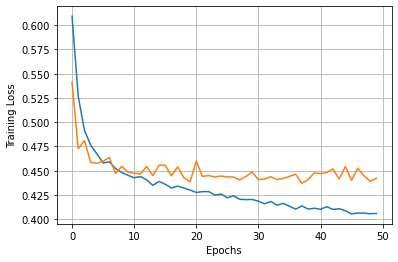

In [8]:
plt.plot(cHist.history['loss'])
plt.plot(cHist.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

In [9]:
cModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1024      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 42,625
Trainable params: 42,625
Non-trainable params: 0
__________________________________________________

Text(0, 0.5, 'Training Accuracy')

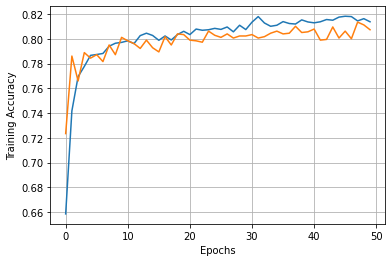

In [10]:
plt.plot(cHist.history['accuracy'])
plt.plot(cHist.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [11]:
cModel.evaluate(cTest, cTestlabel)

70/70 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8060


[0.41846582293510437, 0.8060035705566406]

In [12]:
cPreds = cModel.predict(cTest)
cPreds = cPreds.flatten()
cPreds[:3]

array([0.43031654, 0.80500597, 0.86428905], dtype=float32)

In [13]:
cPredsLabels = []
#cPredsLabels[0:]
for element in cPreds:
    cPredsLabels.append(int(round(element)))
cPredsLabelsA = np.array(cPredsLabels)

In [14]:
print(cPredsLabelsA[:10])
print(cTestlabel[:10])

[0 1 1 1 1 0 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


In [15]:
print(classification_report(cTestlabel,cPredsLabelsA))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1182
           1       0.78      0.82      0.80      1050

    accuracy                           0.81      2232
   macro avg       0.81      0.81      0.81      2232
weighted avg       0.81      0.81      0.81      2232



Text(33.0, 0.5, 'Truth')

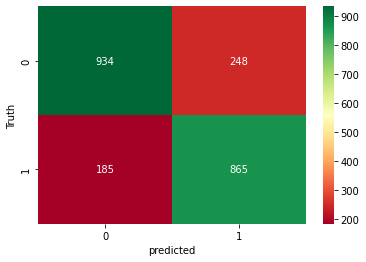

In [16]:
confusion_matrix = tf.math.confusion_matrix(labels=cTestlabel, predictions=cPredsLabelsA)

sn.heatmap(confusion_matrix,annot=True, cmap='RdYlGn', fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')